<img src="White.png" width="900" height="300">

<img src="cognorise.png" width="900" height="300">

### Importation des libraries and packages

In [38]:
import numpy as np
import pandas as pd 
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import datetime as dt
import calendar
from scipy.stats import skew,kurtosis
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.express import bar
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

import warnings

In [39]:
#load the dataset
df=pd.read_csv('super_stores.csv')
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


### Data Exploration

In [40]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [41]:
df.shape

(9800, 18)

#### Analyse Univariee

In [42]:
#Check if is there any not a  number values
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

##### We notice that is 11 missing values in the variable Postal Code 

In [43]:
#Let replace the misisng value with the mode in the variable 
df['Postal Code'].mode()
df['Postal Code'] = df['Postal Code'].fillna(10035.0)
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [44]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55222.544694,230.769059
std,2829.160653,32059.043706,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [45]:
df.describe(include=object)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,1230,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,34,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


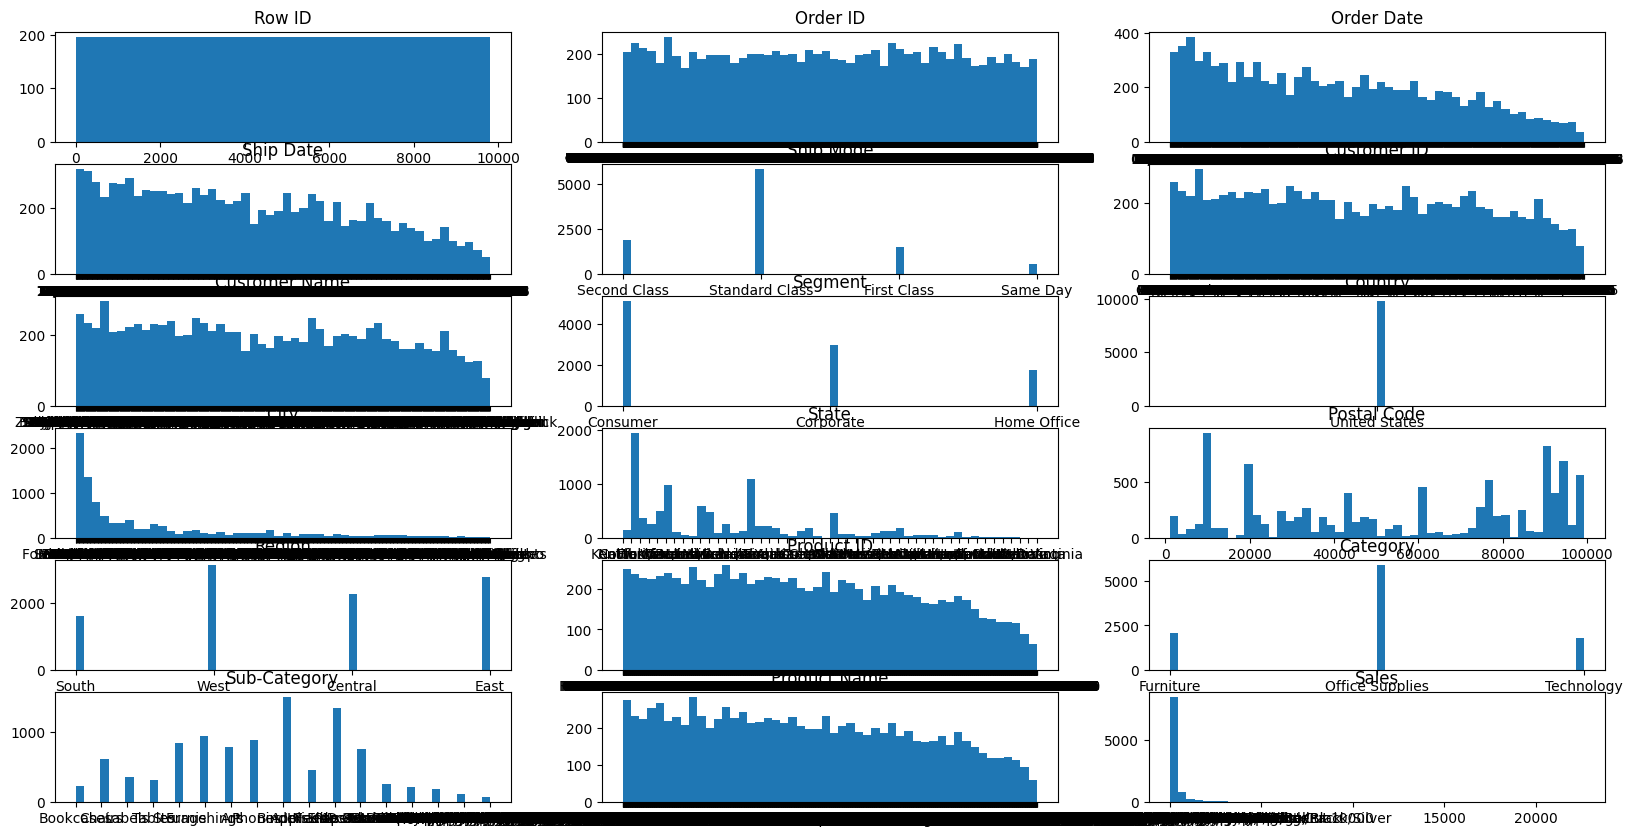

In [46]:
# Visualization of the variables distribution 
fig, axs = plt.subplots(6,3 , figsize=(20, 10))
axs = axs.ravel()

for i, column in enumerate(df.columns):
    axs[i].hist(df[column], bins=50)
    axs[i].set_title(column)

plt.show()

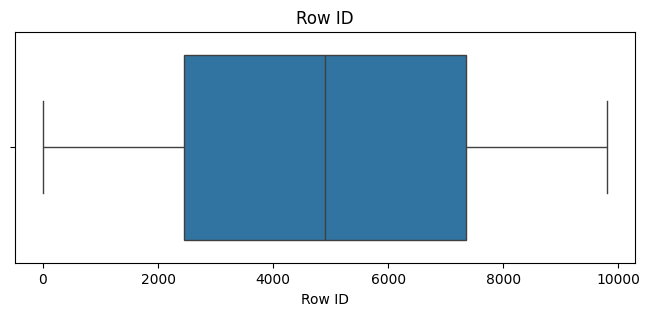

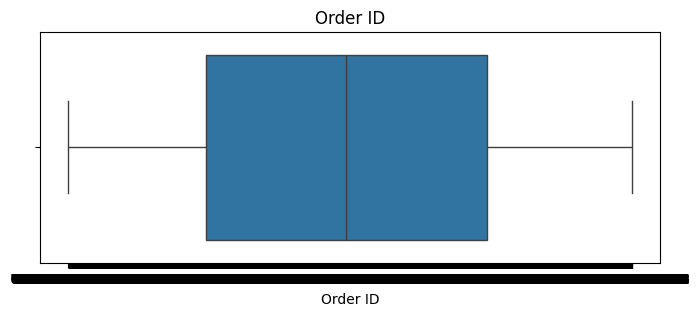

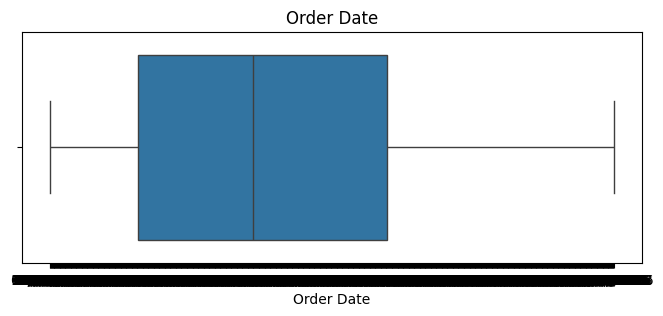

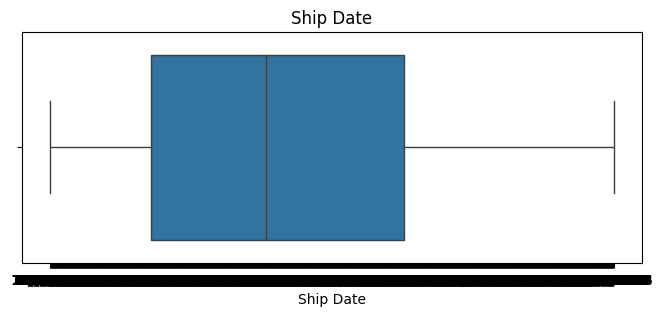

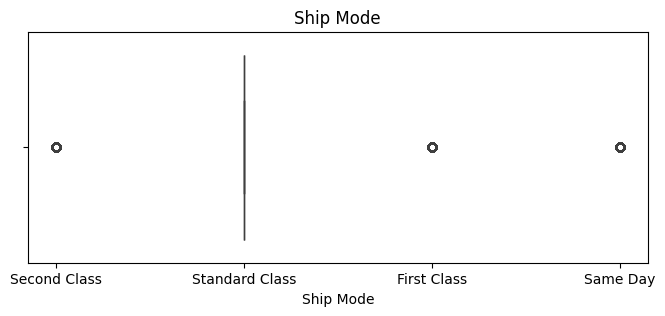

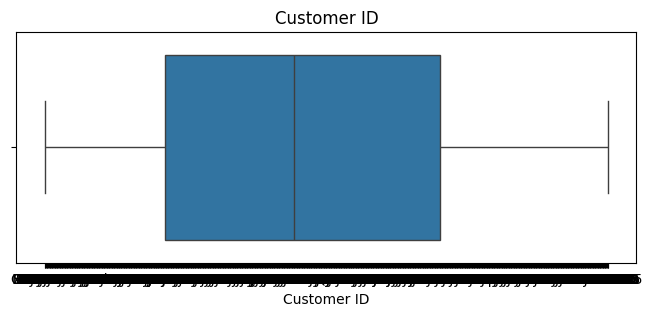

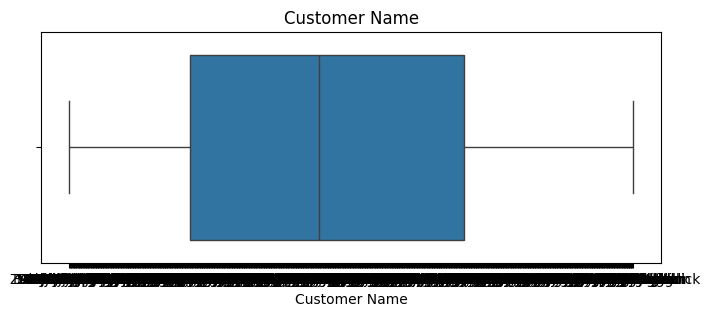

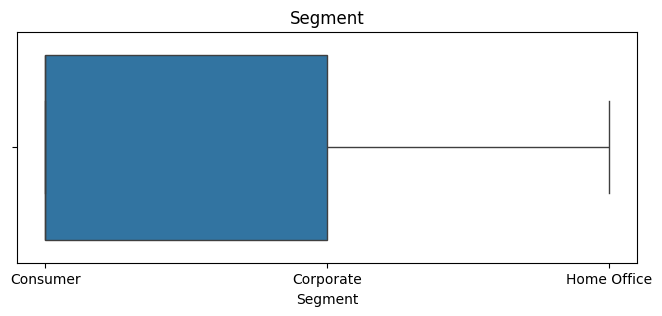

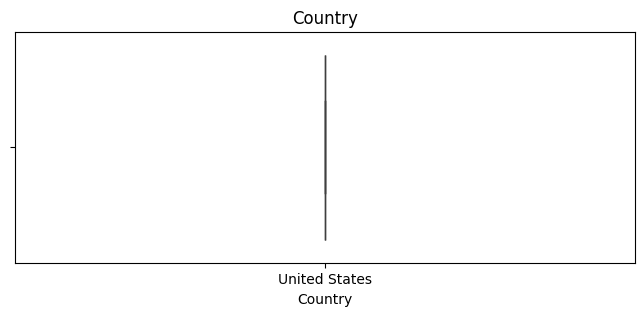

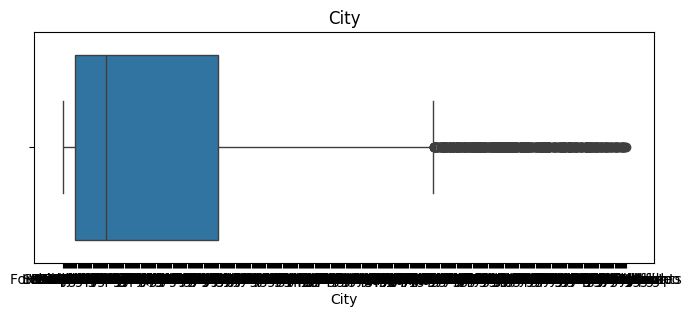

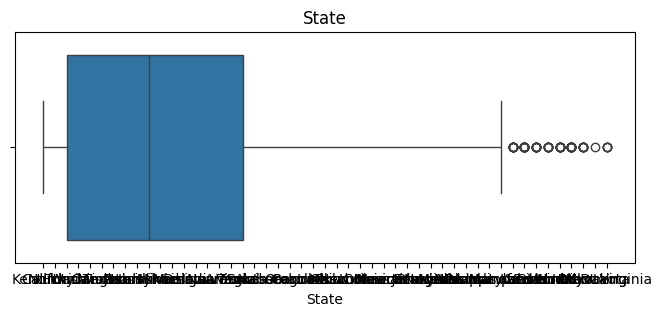

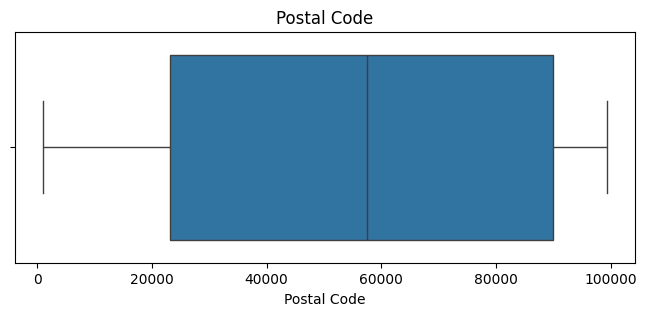

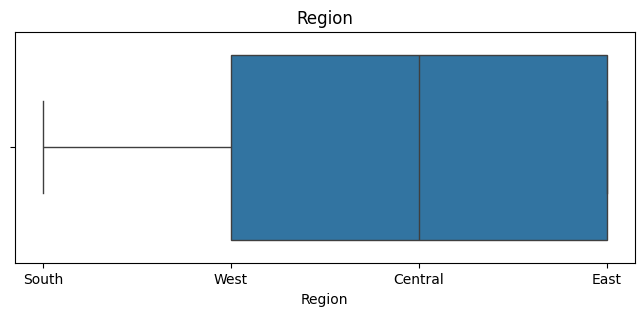

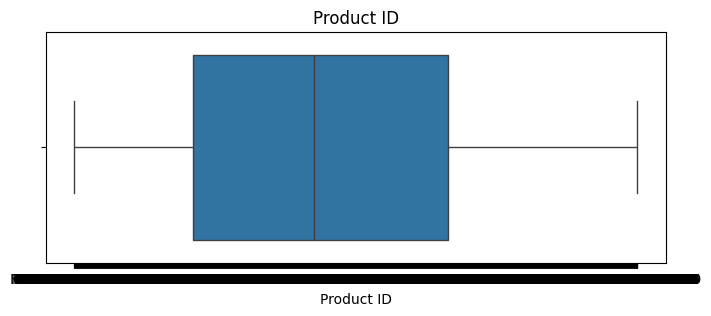

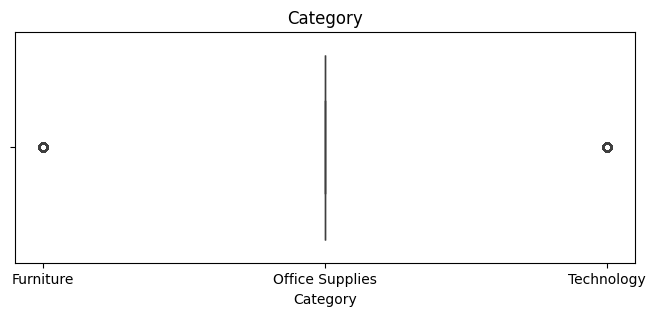

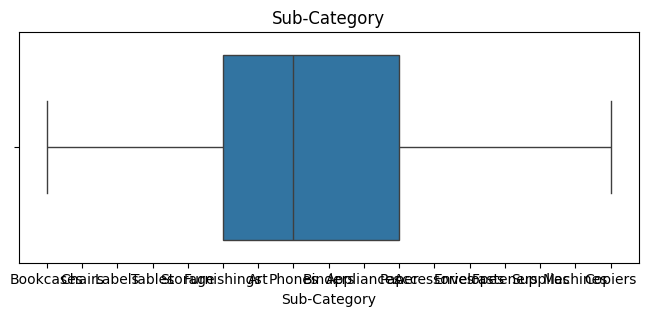

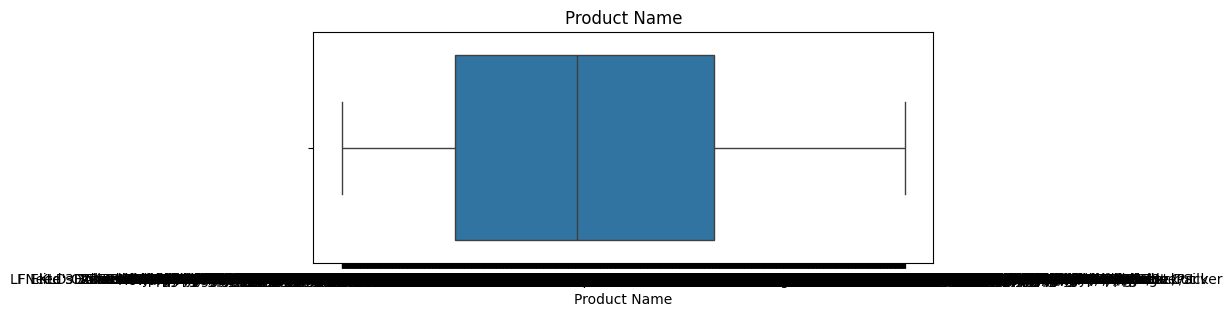

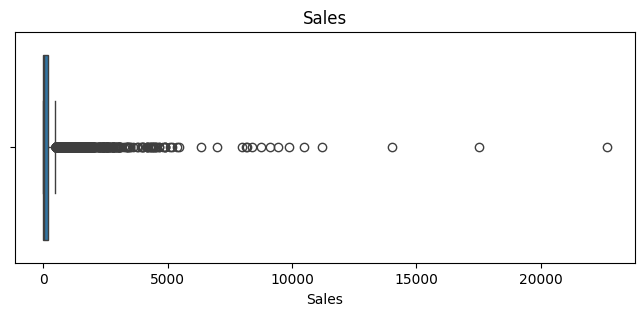

In [47]:
# boxplots for each variabl (to check if is there any outliers)
for column in df.columns:
    fig, ax = plt.subplots(figsize=(8, 3))
    sns.boxplot(x=df[column], ax=ax)
    plt.title(column)
    plt.show()

### Perfoming a feature engineering on dataset

In [48]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')   
df['order_day'] = df['Order Date'].dt.day
df['ship_day'] = df['Ship Date'].dt.day
df['order_year'] = df['Order Date'].dt.year
df['ship_year'] = df['Ship Date'].dt.year
df['Fulfillment_Time'] = df['Ship Date'] - df['Order Date']
df['Fulfillment_Time'] = df['Fulfillment_Time'].dt.days

In [49]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,order_day,ship_day,order_year,ship_year,Fulfillment_Time
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,8,11,2017,2017,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,8,11,2017,2017,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,12,16,2017,2017,4


In [50]:
prod = df[['Category', 'Sub-Category', 'Product Name', 'Sales', 'order_year']]

fig = px.sunburst(
    prod, path=["Category", "Sub-Category"], values="Sales",
    color="Category",
    title="Sales Breakdown by Category and Subcategory",
    width = 1000,
    height = 600
)

fig.show()

In [51]:
cat_sales = prod.groupby(['Category', 'order_year'])['Sales'].sum()

fig = bar(cat_sales.reset_index(), x='Category', y='Sales', color = 'order_year', title=' Sales by Category')
fig.update_layout(xaxis_title='Category', yaxis_title='Total Sales')

In [52]:
fulfilled_categories = df.groupby(['Category'])['Fulfillment_Time'].mean().sort_values().reset_index().head(10)
fulfilled_categories

fig = px.line(
    fulfilled_categories,
    x="Category",
    y="Fulfillment_Time",
    title="Categories with lowest Fulfillment Time",
)

# Customize the chart layout (optional)
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Average Fulfillment Time (Days)",
)

In [53]:
top_products = prod.sort_values(by='Sales', ascending=False).head(10)
top_products

,Category,Sub-Category,Product Name,Sales,order_year
2697,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,2015
6826,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,2017
8153,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,2018
2623,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,2018
4190,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,2018
9039,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,2017
4098,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,2015
4277,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930,2017
8488,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,2017
6425,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976,2017


In [54]:
fulfilled_products = df.groupby(['Product Name'])['Fulfillment_Time'].mean().sort_values().reset_index().head(10)
fulfilled_products

fig = px.line(
    fulfilled_products,
    x="Product Name",
    y="Fulfillment_Time",
    title="Top 5 Products with Highest Fulfillment Time"
)

# Customize the chart layout (optional)
fig.update_layout(
    xaxis_title="Product Name",
    yaxis_title="Average Fulfillment Time (Days)",
)

fig.update_traces(line_color="orange")

In [55]:
yearly_stats = df.groupby('order_year')['Fulfillment_Time'].mean()
year_with_lowest_fulfillment = yearly_stats.idxmin()
lowest_average_fulfillment = yearly_stats.min()
print(f"Year with Lowest Average Fulfillment Time: {year_with_lowest_fulfillment}")
print(f"Average Fulfillment Time for that Year: {lowest_average_fulfillment:.2f} days")

Year with Lowest Average Fulfillment Time: 2018
Average Fulfillment Time for that Year: 3.91 days


In [56]:
fig = px.line(
    yearly_stats.reset_index(),  # Reset index for plotting
    x="order_year",
    y="Fulfillment_Time",
    title="Average Fulfillment Time per Year"
)

# Add a trendline (optional)
fig.update_traces(line_shape="linear")  # Add a trendline

# Customize the chart layout (optional)
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Average Fulfillment Time (Days)"
)

In [57]:
cust = df[['Customer ID', 'Segment', 'Ship Mode', 'State', 'Sales', 'order_year', 'Order Date']]


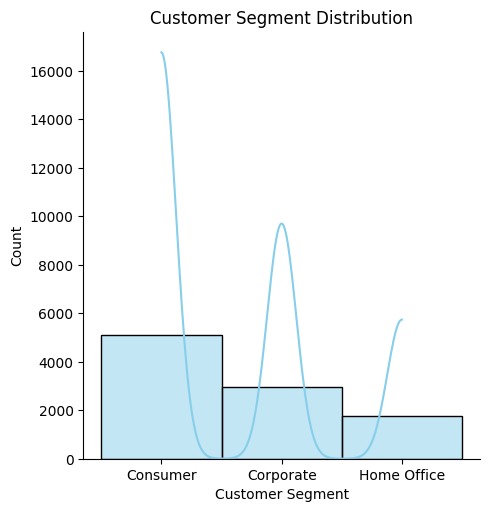

In [58]:
sns.displot(cust['Segment'], kind="hist", kde=True, color="skyblue")
plt.xlabel("Customer Segment")
plt.ylabel("Count")
plt.title("Customer Segment Distribution")
plt.show()

In [59]:
ship_sales = cust.groupby(['Ship Mode'])['Sales'].sum()

fig = bar(ship_sales.reset_index(), x='Ship Mode', y='Sales', title='YOY Sales by Shipping Mode')
fig.update_layout(xaxis_title='Shipping Mode', yaxis_title='Total Sales')

In [60]:
state_sales = cust.groupby(['State'])['Sales'].sum().sort_values(ascending=False).head(10)

fig = go.Figure(data=[go.Pie(labels=state_sales.index, values=state_sales.values)])
fig.update_traces(textposition='inside', textinfo='percent+label')

In [61]:
cust['latest_order_year'] = cust.groupby('Customer ID')['order_year'].transform('max')

cust['churn'] = (cust['order_year'] != cust['latest_order_year'])
churn_rate = cust[cust['churn'] == True].shape[0] / len(cust)
pct = churn_rate * 100

print(f"Churn Rate: {pct:.2f} % ")

Churn Rate: 62.56 % 


In [62]:
## Revenue per user

total_revenue = cust['Sales'].sum()
total_customers = len(cust['Sales'].unique())
RPU = total_revenue / total_customers
print(RPU)

392.8325139308668


In [63]:
cust['AOV'] = cust.groupby('Customer ID')['Sales'].transform('mean')
cust['Purchase_Frequency'] = cust.groupby('Customer ID')['Order Date'].transform('count')

cust['CLTV'] = cust['AOV'] * cust['Purchase_Frequency'] * 2  ## Assuming customer is loyal to the store for 2 years

cust.head(10)

,Customer ID,Segment,Ship Mode,State,Sales,order_year,Order Date,latest_order_year,churn,AOV,Purchase_Frequency,CLTV
0,CG-12520,Consumer,Second Class,Kentucky,261.9600,2017,2017-11-08,2018,True,229.756000,5,2297.560
1,CG-12520,Consumer,Second Class,Kentucky,731.9400,2017,2017-11-08,2018,True,229.756000,5,2297.560
2,DV-13045,Corporate,Second Class,California,14.6200,2017,2017-06-12,2018,True,124.387000,9,2238.966
3,SO-20335,Consumer,Standard Class,Florida,957.5775,2016,2016-10-11,2018,True,173.505033,15,5205.151
4,SO-20335,Consumer,Standard Class,Florida,22.3680,2016,2016-10-11,2018,True,173.505033,15,5205.151
5,BH-11710,Consumer,Standard Class,California,48.8600,2015,2015-06-09,2018,True,260.639625,24,12510.702
6,BH-11710,Consumer,Standard Class,California,7.2800,2015,2015-06-09,2018,True,260.639625,24,12510.702
7,BH-11710,Consumer,Standard Class,California,907.1520,2015,2015-06-09,2018,True,260.639625,24,12510.702
8,BH-11710,Consumer,Standard Class,California,18.5040,2015,2015-06-09,2018,True,260.639625,24,12510.702
9,BH-11710,Consumer,Standard Class,California,114.9000,2015,2015-06-09,2018,True,260.639625,24,12510.702


## Bivariate analyzes

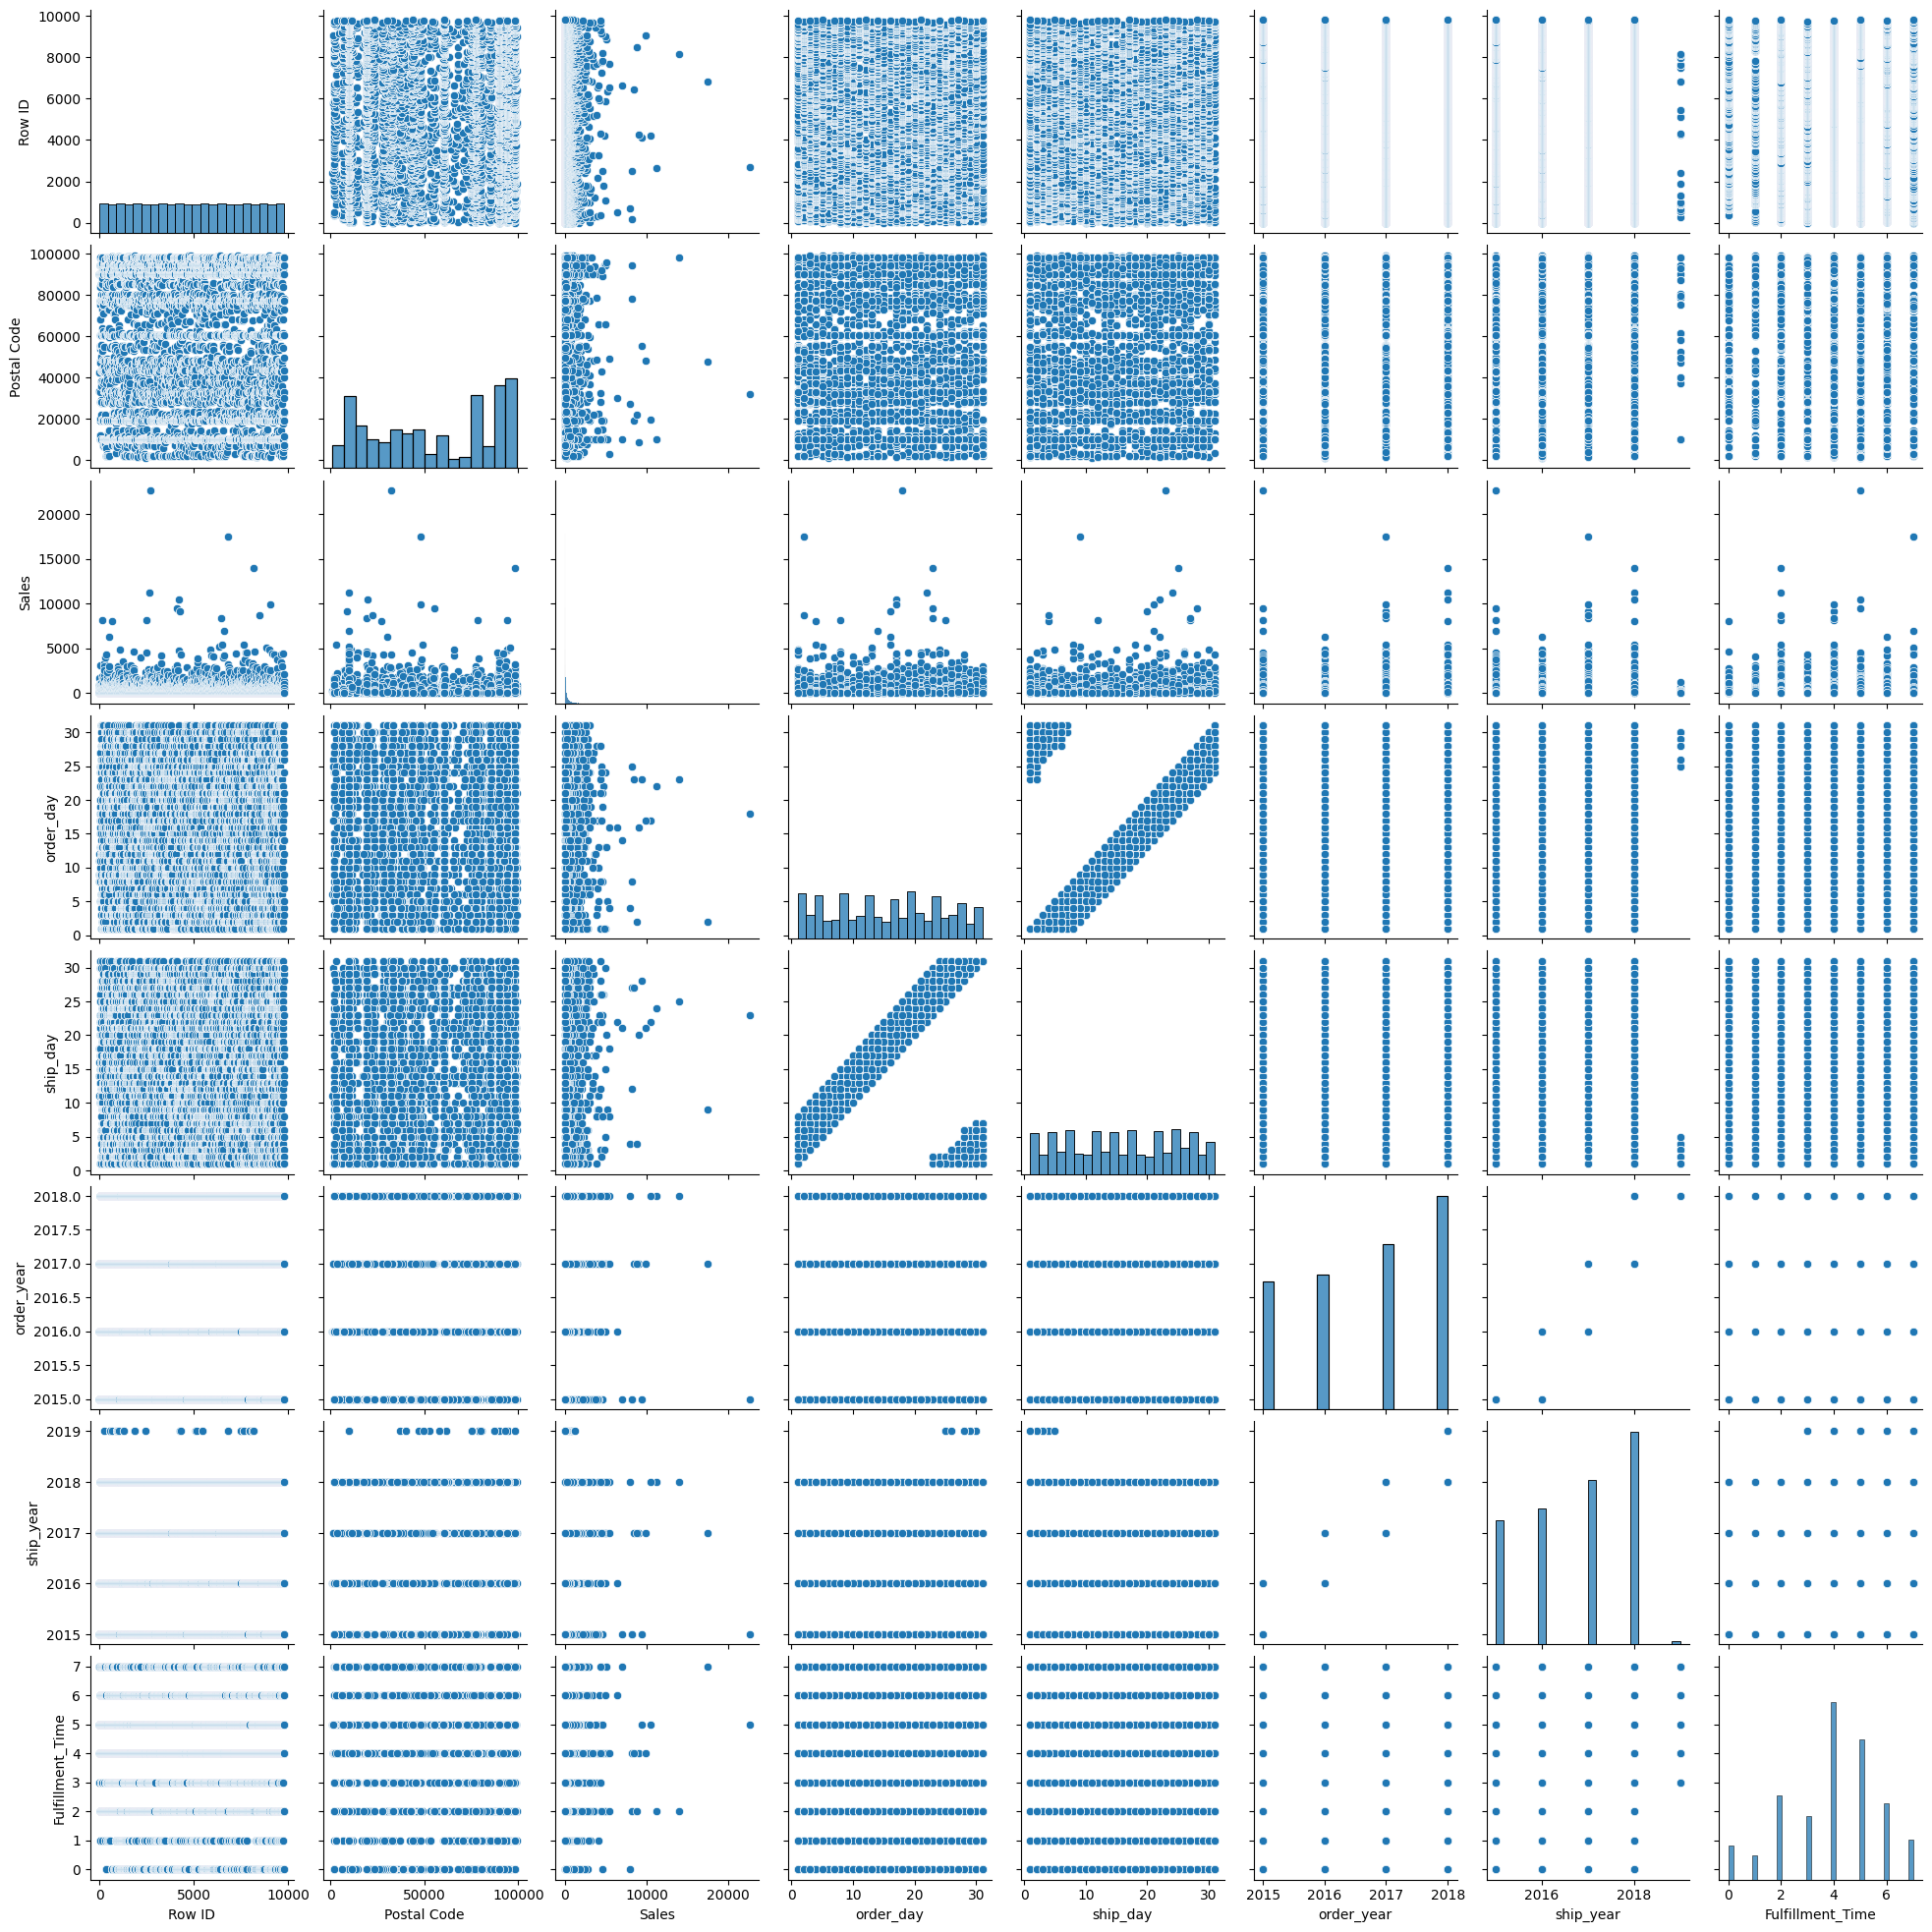

In [64]:
# Bivariate plots
sns.pairplot(df)
plt.show()

In [65]:
df.head(2)
dff=df.drop(['Row ID','Order ID','Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer ID', 'Customer Name','Product ID'], axis=1)
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,order_day,ship_day,order_year,ship_year,Fulfillment_Time
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,8,11,2017,2017,3


In [66]:

print('* There are {} different Segment'.format(len(df['Segment'].unique())))
print('* There are stores in {} states'.format(len(df['State'].unique())))
print('* The are {} different products'.format(len(df['Product ID'].unique())))
print('* There are {} different categories'.format(len(df['Category'].unique())))
print('* There are {} different sub categories'.format(len(df['Sub-Category'].unique())))
print('* There are {} different ship mode'.format(len(df['Ship Mode'].unique())))
print('* There are {} different product name'.format(len(df['Product Name'].unique())))

* There are 3 different Segment
* There are stores in 49 states
* The are 1861 different products
* There are 3 different categories
* There are 17 different sub categories
* There are 4 different ship mode
* There are 1849 different product name


In [67]:
# Sélection des variables X et Y
X = df[['Sales', 'order_day', 'ship_day', 'order_year', 'ship_year']]
y = df['Fulfillment_Time']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression

In [68]:
# Entraînement du modèle de régression linéaire
model = LinearRegression()
model_regr=model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model_regr.predict(X_test)

# Calcul de l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)

print(f"Erreur quadratique moyenne : {mse}")


Erreur quadratique moyenne : 3.0501014670127895


In [69]:
df['Fulfillment_Time'].unique()

array([3, 4, 7, 5, 2, 6, 1, 0], dtype=int64)

### Logistic Regression

### Random Forest with random forest regressor

In [70]:
# Entraînement du modèle de forêts aléatoires
rf_model = RandomForestRegressor()
model_rf=rf_model.fit(X_train, y_train)

#### Support vector Machines

In [71]:
# Entraînement du modèle de Support Vector Machines
svm_model = SVR()
model_svm=svm_model.fit(X_train, y_train)

In [72]:
# Prédiction sur l'ensemble de test pour chaque modèle
y_pred_rf = model_rf.predict(X_test)
y_pred_svm = model_svm.predict(X_test)
y_pred_linear_reg=model_regr.predict(X_test)

In [73]:
# Calcul de l'erreur quadratique moyenne pour chaque modèle
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_svm = mean_squared_error(y_test, y_pred_svm)
mse_regr=mean_squared_error(y_test,y_pred_linear_reg)

print(f"Erreur quadratique moyenne pour Forêts Aléatoires : {mse_rf}")
print(f"Erreur quadratique moyenne pour Support Vector Machines : {mse_svm}")
print(f"Erreur quadratique moyenne pour La regression Linaire : {mse_regr}")


Erreur quadratique moyenne pour Forêts Aléatoires : 0.03903612671485261
Erreur quadratique moyenne pour Support Vector Machines : 3.085362935557324
Erreur quadratique moyenne pour La regression Linaire : 3.0501014670127895


In [74]:
joblib.dump(model_regr, 'model_super_store_regr.pkl')
joblib.dump(model_svm, 'model_super_store_svm.pkl')
joblib.dump(model_rf, 'model_super_store_rf.pkl')

['model_super_store_rf.pkl']

<img src="thank.png" width="900" height="500">

<img src="end.png" width="900" height="500">